# KMeans Clustering in mall customer segmentation

# Import Required Libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Load Dataset

In [8]:
data = pd.read_csv(r"C:\Users\Raksha Chavan\Downloads\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [14]:
data.shape

(200, 5)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
data.isna().sum()/len(data)*100

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [20]:
data.duplicated().sum()

0

In [22]:
data.drop('Gender', axis = 1, inplace = True)

In [24]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [26]:
from sklearn.manifold import TSNE

In [30]:
tsne = TSNE()
tsne.fit(data)

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


TSNE()

In [32]:
cons = pd.DataFrame(tsne.fit_transform(data), columns = ['a', 'b'])
cons

,a,b
0,-12.880663,2.813462
1,-13.569248,-1.167777
2,-13.087231,4.530618
3,-13.462975,-0.772175
4,-12.583505,3.074625
...,...,...
195,16.727289,-4.906759
196,14.916584,1.439869
197,16.856251,-4.546378
198,15.285958,1.722835


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)
x_scaled

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148,  0.03723621],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407,  0.03723621],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298,  0.03723621],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783,  0.03723621],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992,  0.03723621],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627,  0.03723621],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298,  0.03723621],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436,  0.03723621],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767,  0.03723621],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002,  0.03723621],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ,  0.03723621],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216,  0.03723621],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894,  0.03723621],
       [-1.49824268, -1.06573534, -1.5

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

kmeans.fit(x_scaled)

KMeans(n_clusters=3)

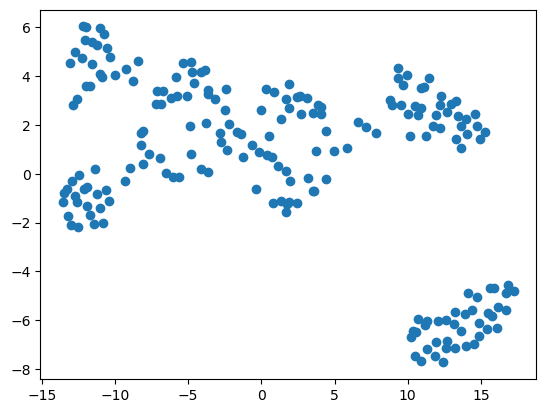

In [60]:
import matplotlib.pyplot as plt
plt.scatter(cons.a , cons.b )

In [66]:
sse = []
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

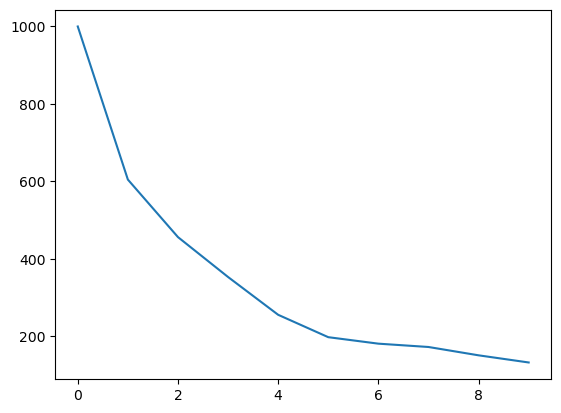

In [67]:
plt.plot(sse[:10])
plt.show()